# Excitation - Inhibition Success Range 

In [2]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [3]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'efa0a27d18c333fb9be5ffaf957cadd91cd66505'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [4]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 

## Excitation - Inhibtion Range

In [5]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
n_patterns = 10

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.1
sequence_decay = 0.0
ampa = True


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

T_recall = 5.0
T_cue = 0.100
n = 10

In [6]:
sequences = [[i for i in range(n_patterns)]]

excitation_range = np.arange(1, 36, 3)
inhibition_range = np.arange(1, 12, 1)

success_matrix = np.zeros((excitation_range.size, inhibition_range.size))

for value_index, value in enumerate(excitation_range):
    print(value_index)
    for inhibition_index, inhibition in enumerate(inhibition_range):

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension, decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta)

        success = calculate_recall_success_sequences(manager, T_recall, T_cue, n, sequences)[0]
        success_matrix[value_index, inhibition_index] = success


0
1
2
3
4
5
6
7
8
9
10
11


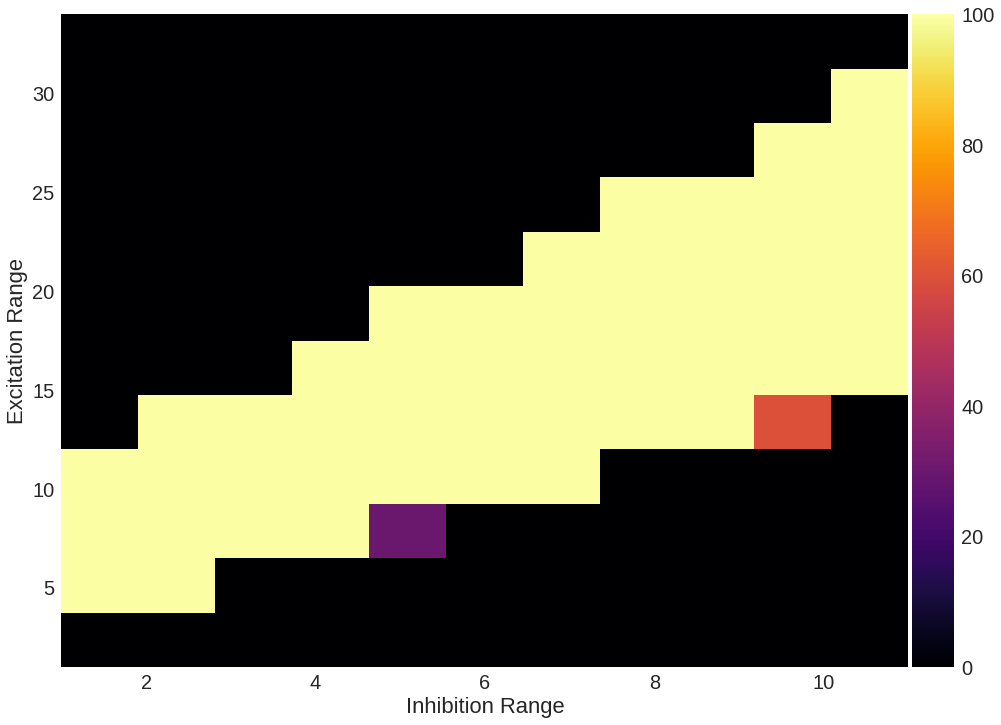

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = 'inferno'

extent = [inhibition_range[0], inhibition_range[-1], excitation_range[0], excitation_range[-1]]
im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')
# im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', aspect='auto')

ax.set_xlabel('Inhibition Range')
ax.set_ylabel('Excitation Range')

ax.grid()

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])